In [1]:
# imports
import pandas as pd
import numpy as np

In [2]:
# read the data with all default parameters
train_df = pd.read_csv(r'E:\EDA\train.csv', index_col='PassengerId')
test_df = pd.read_csv(r'E:\EDA\test.csv', index_col='PassengerId')

In [3]:
train_df.shape

(891, 11)

In [4]:
test_df.shape

(418, 10)

In [5]:
test_df['Survived'] =-11

In [6]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,-11
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,-11
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,-11
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,-11
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,-11


In [7]:
entire_data = pd.concat((train_df,test_df),axis=0,sort=True)

In [8]:
# entire_data.tail(1000)[500:600]

In [9]:
entire_data.isnull().sum()

Age          263
Cabin       1014
Embarked       2
Fare           1
Name           0
Parch          0
Pclass         0
Sex            0
SibSp          0
Survived       0
Ticket         0
dtype: int64

In [11]:
# entire_data['Age'].groupby([entire_data.Pclass,entire_data.Sex]).where('Mr' in entire_data['Name'])


# is 'Mr' in entire_data['Name']

In [12]:
entire_data['Fare'].groupby([entire_data.Pclass,entire_data.Sex]).median()

Pclass  Sex   
1       female    80.92915
        male      49.50420
2       female    23.00000
        male      13.00000
3       female    10.48960
        male       7.89580
Name: Fare, dtype: float64

In [13]:
entire_data[entire_data.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,-11,3701


In [14]:
entire_data['Fare'].fillna(7.89,inplace=True)

In [15]:
entire_data['Fare'][1044]

7.89

In [16]:
entire_data['Name']
# entire_data['Name'].split(',')
def GetTitle(name):
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title
        

In [17]:
entire_data['Title'] =entire_data.Name.map(lambda x : GetTitle(x))

In [18]:
entire_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171,mr
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599,mrs
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282,miss
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803,mrs
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450,mr


In [19]:
medias =entire_data.groupby('Title').Age.transform('median')
medias
entire_data.Age.fillna(medias , inplace=True)

In [20]:
entire_data['Age'].isna().sum()

0

In [21]:
entire_data.isna().sum()

Age            0
Cabin       1014
Embarked       2
Fare           0
Name           0
Parch          0
Pclass         0
Sex            0
SibSp          0
Survived       0
Ticket         0
Title          0
dtype: int64

In [22]:
entire_data.drop('Cabin',axis=1,inplace=True)
entire_data.drop('Name',axis=1,inplace=True)
entire_data.drop('Ticket',axis=1,inplace=True)

In [23]:
entire_data['Pclass'][entire_data.Fare>80].groupby([entire_data.Pclass,entire_data.Embarked]).count()

Pclass  Embarked
1       C           62
        Q            3
        S           50
Name: Pclass, dtype: int64

In [24]:
entire_data[entire_data['Embarked'].isnull()]

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Title
PassengerId,,,,,,,,,
62,38.0,NaN,80.0,0,1,female,0,1,miss
830,62.0,NaN,80.0,0,1,female,0,1,mrs


In [25]:
entire_data.Embarked.fillna('C',inplace=True)

In [26]:
entire_data.isna().sum()

Age         0
Embarked    0
Fare        0
Parch       0
Pclass      0
Sex         0
SibSp       0
Survived    0
Title       0
dtype: int64

In [27]:
entire_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 9 columns):
Age         1309 non-null float64
Embarked    1309 non-null object
Fare        1309 non-null float64
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Title       1309 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 142.3+ KB


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

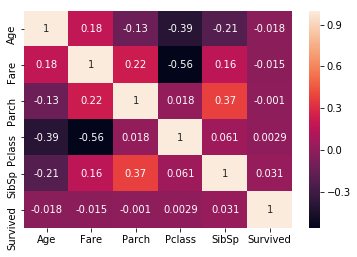

In [35]:
import seaborn as sns
sns.heatmap(entire_data.corr(),annot=True)

In [36]:
new_df =pd.get_dummies(entire_data,drop_first=True)
new_df.head(2)


,Age,Fare,Parch,Pclass,SibSp,Survived,Embarked_Q,Embarked_S,Sex_male,Title_col,...,Title_master,Title_miss,Title_mlle,Title_mme,Title_mr,Title_mrs,Title_ms,Title_rev,Title_sir,Title_the countess
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,22.0,7.2500,0,3,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
2,38.0,71.2833,0,1,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [37]:
new_df.columns

Index(['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Survived', 'Embarked_Q',
       'Embarked_S', 'Sex_male', 'Title_col', 'Title_don', 'Title_dona',
       'Title_dr', 'Title_jonkheer', 'Title_lady', 'Title_major',
       'Title_master', 'Title_miss', 'Title_mlle', 'Title_mme', 'Title_mr',
       'Title_mrs', 'Title_ms', 'Title_rev', 'Title_sir',
       'Title_the countess'],
      dtype='object')

In [38]:
# new_df.drop(['Parch'],axis=1,inplace=True)
# new_df.drop(['Pclass'],axis=1,inplace=True)#rmved

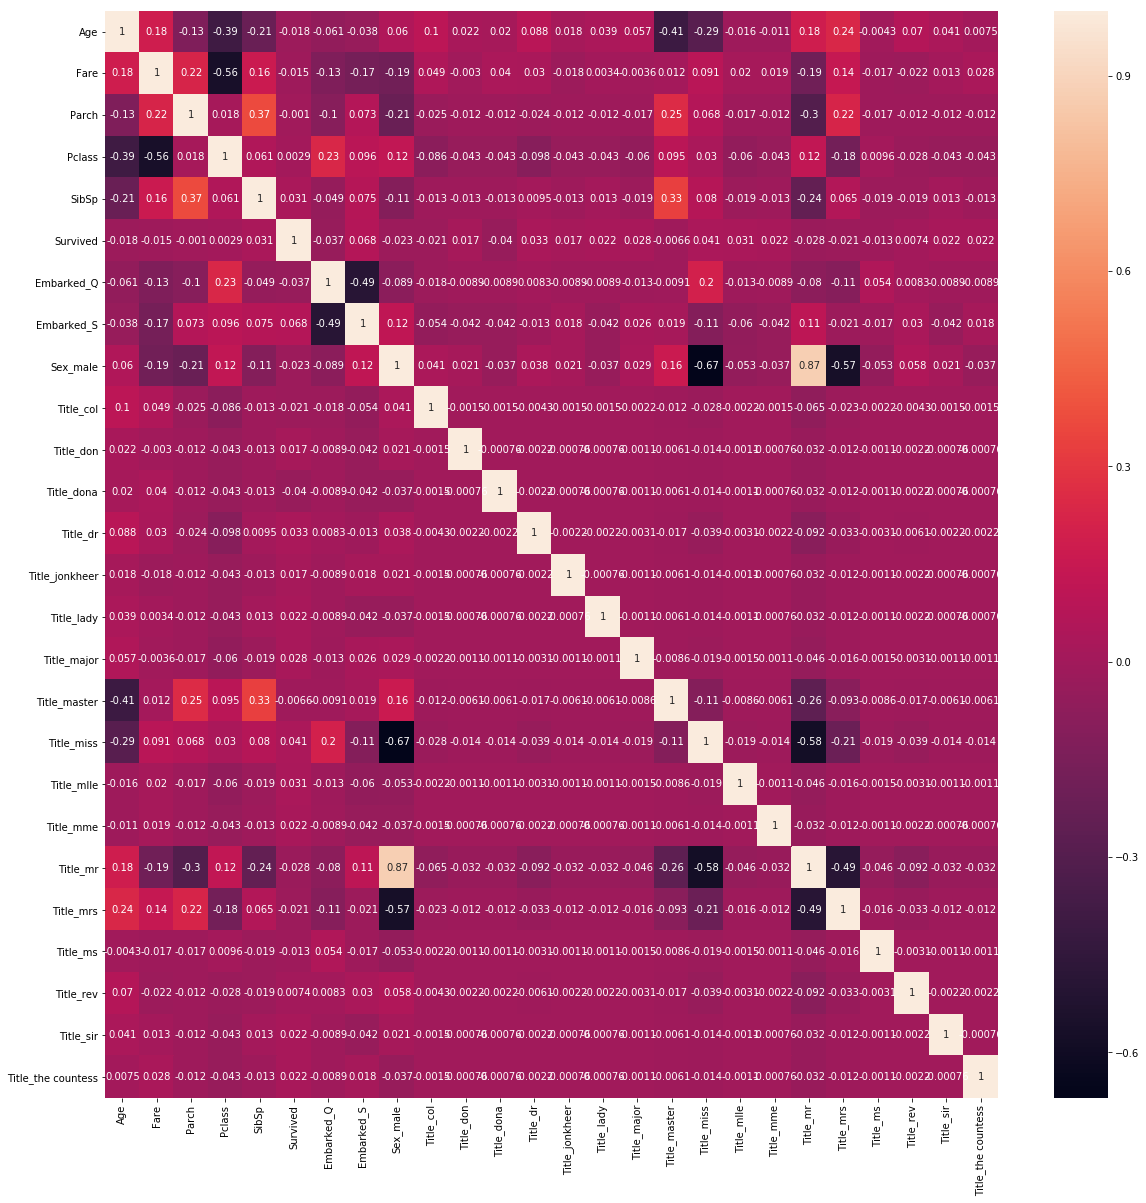

In [39]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(new_df.corr(),annot=True,ax=ax)

In [40]:
# sns.heatmap(new_df.corr(),annot=True)
new_df.isna().sum()

Age                   0
Fare                  0
Parch                 0
Pclass                0
SibSp                 0
Survived              0
Embarked_Q            0
Embarked_S            0
Sex_male              0
Title_col             0
Title_don             0
Title_dona            0
Title_dr              0
Title_jonkheer        0
Title_lady            0
Title_major           0
Title_master          0
Title_miss            0
Title_mlle            0
Title_mme             0
Title_mr              0
Title_mrs             0
Title_ms              0
Title_rev             0
Title_sir             0
Title_the countess    0
dtype: int64

In [41]:
from sklearn.model_selection import train_test_split

In [85]:
x=new_df.drop(['Survived'],axis=1)
# x= x[new_df.Survived != -11]
y=new_df[new_df.Survived != -11].Survived

x_train,x_test,y_train=x.head(891),x.tail(418),y.head(891)
print(x.shape,y.shape)

(1309, 25) (891,)


In [43]:
x_t= x_train
y_t =y_train
x1_train,x1_test,y1_train,y1_test=train_test_split(x_t,y_t,test_size=0.3,random_state=1)

In [44]:
from sklearn.linear_model import LogisticRegression

In [46]:
lm = LogisticRegression()
# lm2 = LogisticRegression()

In [47]:
lm.fit(x_train,y_train)
# lm2.fit(x1_train,y1_train)
lm.score(x_train,y_train)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8316498316498316

In [41]:
x_test.head()

,Age,Fare,Parch,Pclass,SibSp,Embarked_Q,Embarked_S,Sex_male,Title_col,Title_don,...,Title_master,Title_miss,Title_mlle,Title_mme,Title_mr,Title_mrs,Title_ms,Title_rev,Title_sir,Title_the countess
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,34.5,7.8292,0,3,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
893,47.0,7.0000,0,3,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
894,62.0,9.6875,0,2,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
895,27.0,8.6625,0,3,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
896,22.0,12.2875,1,3,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [53]:
predict=lm.predict(x_test)
# print(pd.crosstab(y_train,predict))
lm.score(x_train,y_train)

0.8316498316498316

In [54]:
predict

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [57]:
mysub = pd.DataFrame({'PassengerId':x_test.index,'Survived':predict},index=None)

In [58]:
mysub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [46]:
# mysub.to_csv('mysubmission.csv')

In [60]:
# predict=lm2.predict(x_test)
# print(pd.crosstab(y_test,predict))

In [61]:
predict=lm.predict(x_train)
print(pd.crosstab(y_train,predict))

col_0       0    1
Survived          
0         485   64
1          86  256


In [49]:
predict2=lm2.predict(x_t)
print(pd.crosstab(y_t,predict2))

col_0       0    1
Survived          
0         487   62
1          89  253


In [50]:
predict=lm.predict(x1_train)
print(pd.crosstab(y1_train,predict))

col_0       0    1
Survived          
0         349   47
1          51  176


In [51]:
############

In [62]:
from sklearn import metrics

In [53]:
predict_poob=lm2.predict_proba(x_test)
predict_poob2=lm2.predict_proba(x_train)

In [54]:
fpr,tpr,threshold =metrics.roc_curve(y_test,predict_poob[:,1])
fpr1,tpr1,threshold1 =metrics.roc_curve(y_train,predict_poob2[:,1])

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


(-0.05, 1.05)

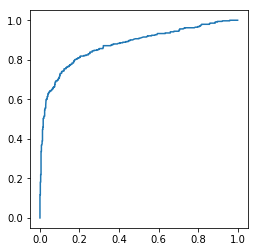

In [55]:
plt.plot(fpr1,tpr1,label="Roc Curve")
plt.axes().set_aspect('equal')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

In [56]:
AUC = metrics.auc(fpr,tpr)
AUC

0.4689273830495205

In [57]:
import statsmodels.discrete.discrete_model as sn
from statsmodels.api import add_constant

In [58]:
x_train.head()

,Age,Fare,Parch,Pclass,SibSp,Embarked_Q,Embarked_S,Sex_male,Title_col,Title_don,...,Title_master,Title_miss,Title_mlle,Title_mme,Title_mr,Title_mrs,Title_ms,Title_rev,Title_sir,Title_the countess
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,22.0,7.2500,0,3,1,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,38.0,71.2833,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,26.0,7.9250,0,3,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,35.0,53.1000,0,1,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,35.0,8.0500,0,3,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [59]:
# import statsmodels.api as sm
# x2=add_constant(x_train)
# logit= sm.Logit(y_train,x2)
# res =logit.fit()
# print(res.summary())
print("###############")


###############


In [60]:
#################decision Tree

In [86]:
#PCA
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)



C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [80]:
lg2=LogisticRegression()

In [81]:
model_lg =lg2.fit(x_train,y_train)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [82]:
pred_lg2=lg2.predict(x_train)

In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,pred_lg2)

0.8338945005611672

In [87]:
###PCA
# Applying PCA
from sklearn.decomposition import PCA
pc =PCA(n_components =17)
x_train=pc.fit_transform(x_train)
x_test =pc.transform(x_test)
expvar=pc.explained_variance_ratio_
print(expvar)
# expvar[:4].sum()
lg2=LogisticRegression()
model_lg =lg2.fit(x_train,y_train)
pred_lg2=lg2.predict(x_train)
accuracy_score(y_train,pred_lg2)

[0.12550592 0.08760454 0.07419231 0.05787503 0.04893867 0.04426024
 0.04261729 0.04200615 0.04191376 0.04181901 0.04175982 0.04173848
 0.04173013 0.04172338 0.04171441 0.04137273 0.04037595]


C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8305274971941639

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn import metrics

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
from sklearn.model_selection import cross_val_score

In [109]:
x=new_df.drop(['Survived'],axis=1)
# x= x[new_df.Survived != -11]
y=new_df[new_df.Survived != -11].Survived
x_std =StandardScaler().fit_transform(x)
x_train,x_test,y_train,y_test=x_std[:891],x_std[892:],y.head(891),y.tail(418)
print(y.shape,x.shape,len(x_std))
# x_test

(891,) (1309, 25) 1309


C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [91]:
dtc2 =DecisionTreeClassifier(criterion='entropy',random_state=1)
nv = GaussianNB()
lr = LogisticRegression()
rf_model =RandomForestClassifier(criterion='entropy',random_state=1)
knn = KNeighborsClassifier()

In [92]:
params={'max_depth':np.arange(1,15)}
gs = GridSearchCV(dtc2,params,cv=3)
gs.fit(x_train,y_train)#grid search k fold validation here  5fold as cv =5
print(gs.best_params_)

params1={'max_depth':np.arange(1,15),'n_estimators':np.arange(1,100)}
gs = GridSearchCV(rf_model,params1,cv=3)
gs.fit(x_train,y_train)#grid search k fold validation here  5fold as cv =5
print(gs.best_params_)

params2={'n_neighbors':np.arange(1,15)}
gs = GridSearchCV(knn,params2,cv=5)
gs.fit(x_train,y_train)#grid search k fold validation here  5fold as cv =5
print(gs.best_params_)


# params={'max_depth':np.arange(1,15)}
# gs = GridSearchCV(dnt,params,cv=5)
# gs.fit(x.head(891),y)#grid search k fold validation here  5fold as cv =5
# print(gs.best_params_)

{'max_depth': 3}
{'n_estimators': 28, 'max_depth': 4}
{'n_neighbors': 12}


In [93]:
dtc2 =DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth=3)
nv = GaussianNB()
lr = LogisticRegression()
rf_model =RandomForestClassifier(criterion='entropy',random_state=1,max_depth=4,n_estimators=28)
knn = KNeighborsClassifier(n_neighbors=12)

In [96]:
models =[]
models.append(('Decisiontree',dtc2))
models.append(('Randomforest',rf_model))
models.append(('Naivesbaise',nv))
models.append(('knn',knn))
# models.append(('lr',lr))

Decisiontree: 0.804714(0.009912)
Randomforest: 0.820426(0.003174)
Naivesbaise: 0.613917(0.026417)
knn: 0.804714(0.029737)


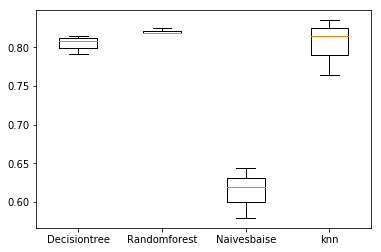

In [98]:
from sklearn import model_selection
results =[]
names=[]
scoring='accuracy'
for name,model in models:
    kfold = model_selection.KFold(n_splits=3,random_state=1)
#     print(kfold,"kkff")
    cv_results =model_selection.cross_val_score(model,x_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s: %f(%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)
fig =plt.figure()
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [100]:
dtc2.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [105]:
# predict=dtc2.predict(x_test)
# print(predict,len(predict))
dtc2.score(x_train,y_train)

0.8260381593714927

array([[156, 106],
       [100,  56]], dtype=int64)

In [126]:
mysub = pd.DataFrame({'PassengerId':x.tail(417).index,'Survived':predict})
mysub.to_csv('mysubmissiondec1.csv')

In [125]:
mysub

,PassengerId,Survived
0,893,1
1,894,0
2,895,0
3,896,1
4,897,0
5,898,1
6,899,0
7,900,1
8,901,0
9,902,0
